<a href="https://colab.research.google.com/github/nou321/PFE_Nour/blob/main/Lime_Method2casVF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import os
from PIL import Image
import numpy as np
import pandas as pd
from skimage.io import imread
import matplotlib.pyplot as plt
import shutil
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.metrics import make_scorer, recall_score, precision_score

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation, BatchNormalization
from keras.backend import dropout




from sklearn.model_selection import cross_val_score
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
from tensorflow.keras import preprocessing
from tensorflow.keras.models import Model

In [5]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=a020a4336fbad2591cedf9e152e99dc278c1add66945e51ecca1f8421e195d56
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [7]:
from google.colab import drive
drive.mount('/content/drive')
sj_path='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/sj'
nsj_path='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/nsj'

Mounted at /content/drive


In [8]:

image1=Image.open("/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/DATA_(512,512)/sj_data/009.jpg")
image2=Image.open("/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/DATA_(512,512)/sj_data/013.jpg")
image3=Image.open("/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/DATA_(512,512)/sj_data/020.jpg")
img1=np.array(image1)
img2=np.array(image2)
img3=np.array(image3)

img_tensor1 = preprocessing.image.img_to_array(img1)
X1 = np.expand_dims(img_tensor1, axis=0)
img_tensor2 = preprocessing.image.img_to_array(img2)
X2 = np.expand_dims(img_tensor2, axis=0)
img_tensor3 = preprocessing.image.img_to_array(img3)
X3 = np.expand_dims(img_tensor3, axis=0)

image4=Image.open("/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/DATA_(512,512)/nsj_data/004.jpg")
image5=Image.open("/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/DATA_(512,512)/nsj_data/005.jpg")
image6=Image.open("/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/DATA_(512,512)/nsj_data/224.jpg")

img4=np.array(image4)
img5=np.array(image5)
img6=np.array(image6)
images=[img1,img2,img3,img4,img5,img6]
img_tensor4 = preprocessing.image.img_to_array(img4)
X4 = np.expand_dims(img_tensor4, axis=0)
img_tensor5 = preprocessing.image.img_to_array(img5)
X5 = np.expand_dims(img_tensor5, axis=0)
img_tensor6 = preprocessing.image.img_to_array(img6)
X6 = np.expand_dims(img_tensor6, axis=0)
Xs=[X1,X2,X3,X4,X5,X6]




In [9]:
image=Image.open("/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/DATA_(512,512)/sj_data/019.jpg")
img=np.array(image)

In [10]:
X1.shape

(1, 512, 512, 1)

In [11]:
model = keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/ModelSjogren3splits.h5")


In [12]:
from lime import lime_image
from lime.wrappers.scikit_image import SegmentationAlgorithm
explainer = lime_image.LimeImageExplainer()


In [13]:
pred=model.predict(X1)
classe= np.where(pred>0.5,1.,0)
if(classe==1):
    r=np.argmax([0,0.8])
    print(r)
else :
  r=np.argmax(classe)
  print(r)

1/1 [==============================] - 2s 2s/step
1


In [14]:
from skimage.color import rgb2gray,gray2rgb
def new_predict_fn(images):
    images=rgb2gray(images)
    images = np.expand_dims(images, axis=-1)
    pred=model.predict(images)
    classe= np.where(pred>0.5,1.,0)
    return classe

In [ ]:
explanation = explainer.explain_instance(gray2rgb(img3),new_predict_fn, top_labels=2, hide_color=0, num_samples=10000)

  0%|          | 0/10000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 29ms/step


In [17]:

from skimage.segmentation import mark_boundaries


In [ ]:
explanation.top_labels

[0]

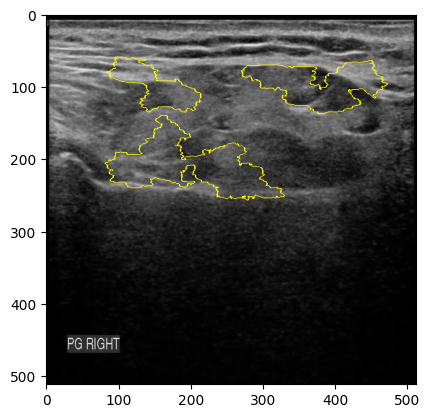

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=15, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

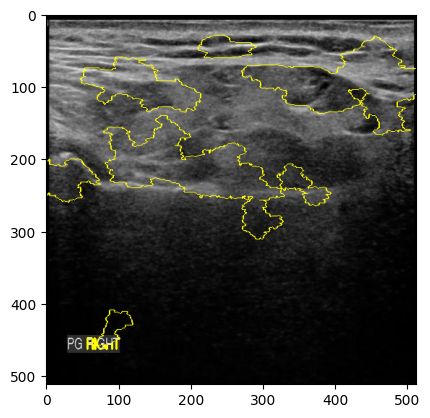

In [ ]:
temp1, mask1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=30, hide_rest=False)
plt.imshow(mark_boundaries(temp1 , mask1))

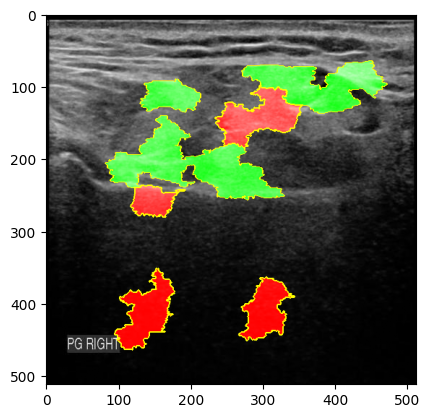

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=20 ,hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import gray2rgb, rgb2gray, label2rgb

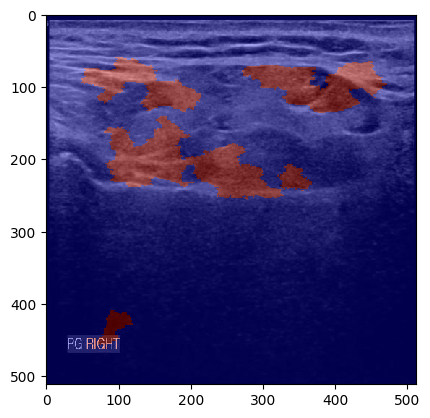

In [ ]:
temp, mask = explanation.get_image_and_mask(0, positive_only=True, num_features=20, hide_rest=False, min_weight = 0.01)
plt.imshow(label2rgb(3-mask,temp, bg_label = 0), interpolation = 'nearest')

# 2eme try

In [15]:
from lime import lime_image


from sklearn.linear_model import LinearRegression
from lime.wrappers.scikit_image import SegmentationAlgorithm
explainer1 = lime_image.LimeImageExplainer(verbose = False)
segmenter1 = SegmentationAlgorithm('quickshift', kernel_size=4,max_dist=200, ratio=0.05)

explanation1 = explainer1.explain_instance(gray2rgb(img4),new_predict_fn,top_labels=10, hide_color=0, num_samples=10000,segmentation_fn=segmenter1)

  0%|          | 0/10000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 25ms/step


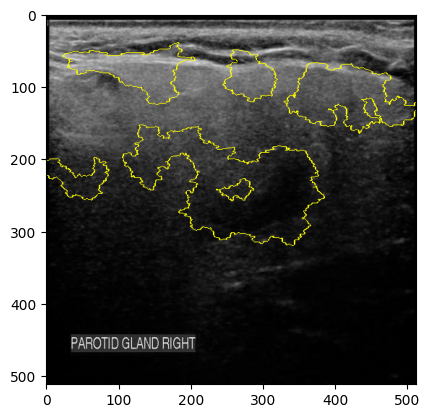

In [21]:
temp, mask = explanation1.get_image_and_mask(explanation1.top_labels[0], positive_only=True, num_features=20 ,hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

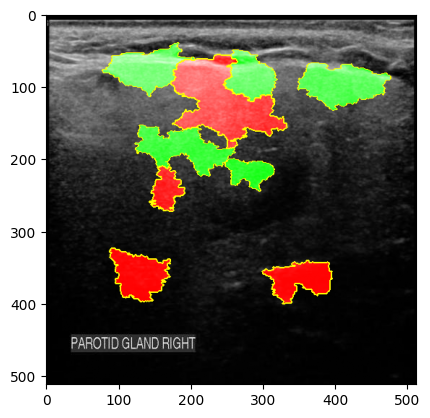

In [22]:
temp2, mask2 = explanation1.get_image_and_mask(explanation1.top_labels[0], positive_only=False, num_features=20 ,hide_rest=False)
plt.imshow(mark_boundaries(temp2, mask2))